

# Project: Investigate a Dataset (Medical Appointment No Show)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction
>  The Dataset I am working on is No Show Appointment. I will communicate my finding with the help of python libraries pandas numpy matplotlib and seaborn. This dataset collects information in brazil from 110k patients and focuses on a different aspect that influences patients show up at the appointment.

In [1]:
#import useful packages
 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling

In [2]:
# Data Load 
df = pd.read_csv('no_show appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We can see that
- Many useless columns which can be remove
- column names don't have structure

In [3]:
#Number of samples 
df.shape

(110527, 14)

In [4]:
# To find datatypes and missing values
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

As we can see
- Patients have duplicated values
- there are 5 handcap 81 unique neibourhood 

# Data Cleaning

In [5]:
# Droping not usable attributes 
df.drop(['PatientId', 'ScheduledDay','AppointmentDay'], axis = 1, inplace = True)
df.head()

,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# To find that AppointmentID has all unique values
df['AppointmentID'].nunique()

110527

In [7]:
# Tidy up Column names
# step 1: lower case all the values
df.rename(columns= lambda x: x.lower(), inplace = True)
df.head()

,appointmentid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# Tidy up Column names
# step 2: sepraing 2 values with _
df.rename(columns={"appointmentid": "appointment_id", 
                         "no-show": "no_show"}, inplace = True)

In [9]:
# Converting No_show value to numerical and quantifiable value
df['no_show'].replace(('Yes', 'No'), (1, 0), inplace=True)
df.head(5)

,appointment_id,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [10]:
# To change Handcap value to binary 
df['handcap_new'] = (df['handcap']>=1).astype(int)


In [11]:
df.head()
#df.nunique()

,appointment_id,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,handcap_new
0,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


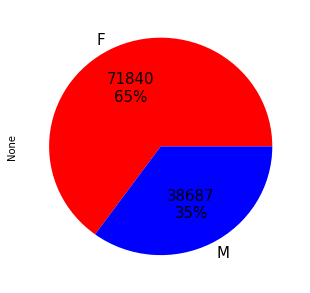

In [12]:
# To find out percetage of Male and Female patients on pie chart
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

fig, ax1 = plt.subplots(ncols=1, figsize=(5, 5))

df.groupby('gender').size().plot(kind='pie',autopct=label_function,textprops={'fontsize': 15},
                                  colors=['r', 'b'], ax=ax1)

plt.show()

### Question 1: Highest neighbourhood with no show appointment

Text(0.5,1,'5 Highest neighbourhood with no show appointment')

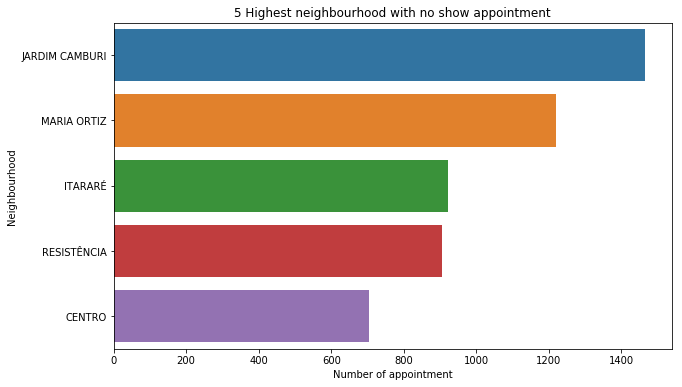

In [13]:
no_show_values = df[df['no_show'] == 1]
top_values = no_show_values['neighbourhood'].value_counts().index[:5]
plt.figure(figsize=(10,6))
sns.countplot(data = no_show_values, y = 'neighbourhood', order = top_values)
plt.xlabel('Number of appointment')
plt.ylabel('Neighbourhood')
plt.title('5 Highest neighbourhood with no show appointment')

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

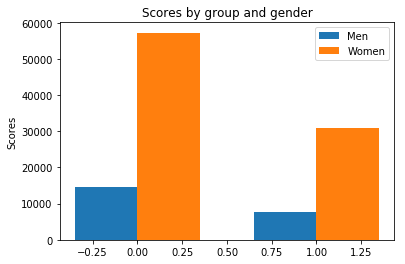

In [14]:
def no_shows_by_gender(input_gender, input_no_show):
 
  proportion = df[(df['gender'] == input_gender) & (df['no_show'] == input_no_show)]
 
  proportion = int(len(proportion))
 
  return proportion
females_show = no_shows_by_gender("F",0)
females_no_shows = no_shows_by_gender("F",1)
male_show = no_shows_by_gender("M",0)
male_no_show =no_shows_by_gender("M",1)

labels = ['No_show','Show']
No_show = [females_no_shows,male_no_show]
Show = [females_show,male_show]

x = np.arange(len(labels))  
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, No_show, width, label='Men')
rects2 = ax.bar(x + width/2, Show, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

### Question 3: Is having scholarship or not effect the appointment?

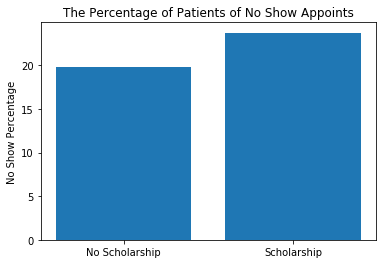

In [15]:
percentage_scholarship = df.groupby('scholarship').no_show.mean() * 100

# plot a bar chart
plt.bar(x = percentage_scholarship.index, height = percentage_scholarship)
plt.title('The Percentage of Patients of No Show Appoints')
plt.xticks([0, 1], ['No Scholarship', 'Scholarship'])
plt.ylabel('No Show Percentage');


### Question 4: Is age effect the appointment:

In [16]:
df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [17]:
# Making age groups based on percetages
bins = [-1, 18, 37,55, 115]
bin_names = ['0-18', '19-37', '37-55', '56-115']
age_groups = pd.cut(df['age'], bins, labels = bin_names)
df.insert(3, 'age_groups',age_groups)
df.head()

,appointment_id,gender,age,age_groups,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,handcap_new
0,5642903,F,62,56-115,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,5642503,M,56,56-115,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,5642549,F,62,56-115,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,5642828,F,8,0-18,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,5642494,F,56,56-115,JARDIM DA PENHA,0,1,1,0,0,0,0,0


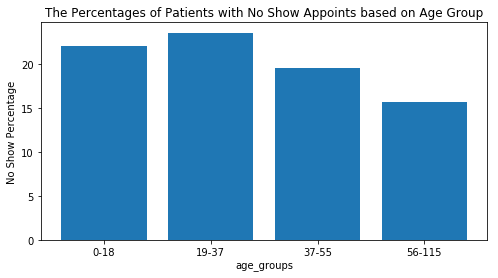

In [18]:
percentage_age = df.groupby('age_groups').no_show.mean() * 100

# plot a bar chart
plt.figure(figsize = [8, 4])
plt.bar(x = percentage_age.index, height = percentage_age)
plt.title('The Percentages of Patients with No Show Appoints based on Age Group')
plt.xlabel('age_groups')
plt.ylabel('No Show Percentage');

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])